<a href="https://colab.research.google.com/github/SoheeKim12/Python_Programming_Study/blob/main/pandas_exercises/07_Visualization/Titanic_Desaster/Exercises_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic

In [3]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'

titanic = pd.read_csv(url)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index

In [5]:
titanic.set_index('PassengerId').head() # set_index 함수

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [7]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

In [10]:
# put them into a list called proportions
proportions = [males, females]

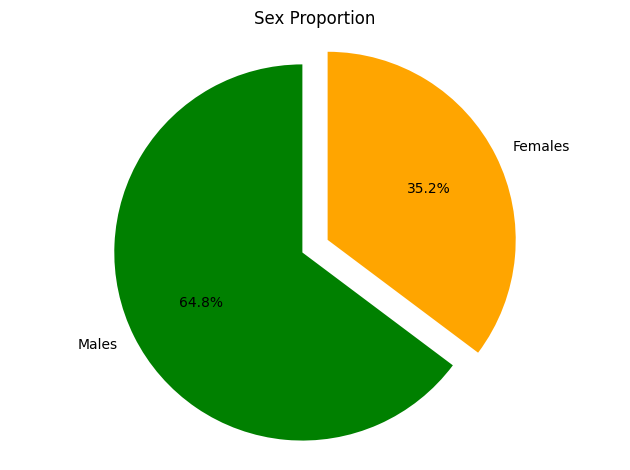

In [19]:
# Create a pie chart -> plt.pie
plt.pie(
    # 데이터 위에서 정의
    proportions,

    # 각 섹터의 이름 지정
    labels = ['Males', 'Females'],

    # 차트에 그림자 추가 여부
    shadow = False,

    # 색상 지정
    colors = ['green','orange'],

    # 일부 섹터를 강조하기 위해 첫번째 섹터를 0.15만큼 바깥으로 조금 띄우고 두 번째 섹터는 그대로 둠.
    explode = (0.15 , 0),

    # 파이 차트의 시작 각도 설정
    startangle = 90,

    # 섹터의 비율을 퍼센트 형태로 표시
    autopct = '%1.1f%%' # 숫자를 소수점 첫째 자리까지 표시
    )

# 축, 차트 제목 설정
plt.axis('equal')
plt.title("Sex Proportion")

# View the plot
plt.tight_layout() # 레이아웃의 간격을 자동으로 조정하여 요소 간의 간격을 적절히 조절해 주는 함수
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

지불한 요금과 연령을 사용하여 산점도를 만들고 성별에 따라 플롯 색상을 다르게 표시

(-5.0, 85.0)

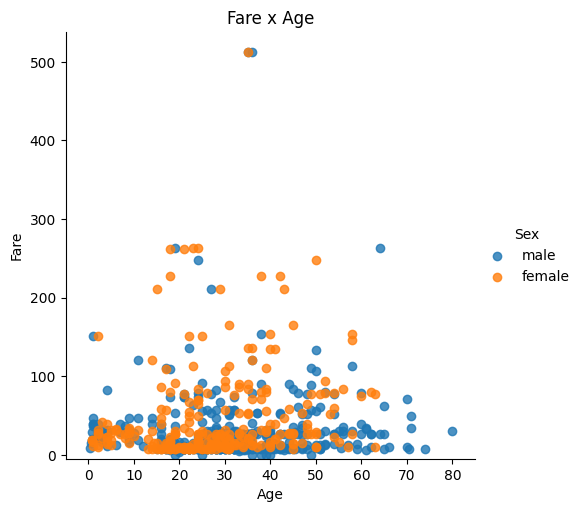

In [20]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [21]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

In [23]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False) # 내림차순 정렬
df

,Fare
258,512.3292
737,512.3292
679,512.3292
88,263.0000
27,263.0000
...,...
633,0.0000
413,0.0000
822,0.0000
732,0.0000


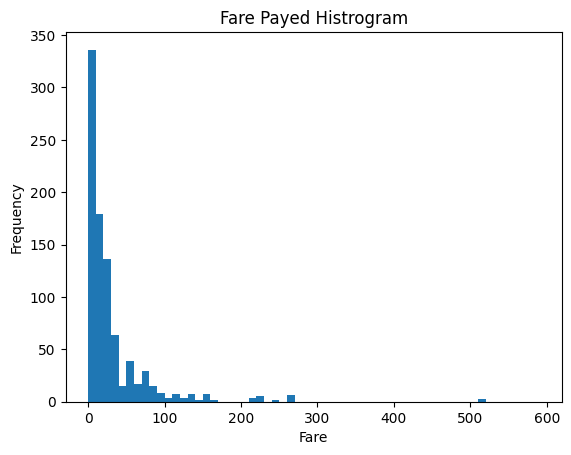

In [24]:
# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

### BONUS: Create your own question and answer it.